In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

['mnist_train.csv', 'mnist_test.csv']


This is a very simple kernel for the famous MNIST dataset. Here, we ar going to see how three different classifiers perform on the data set. 

First, we will be using the `SGDClassifier` and see how it performs for `loss` = 'hinge' (linear SVM) and `loss` = 'log' (Logistic Regression). 

Then, we will train the set using the K-Nearest Neighbor Classifier. We will try to get above 95% accuracy by the end of training.

In [26]:
train = pd.read_csv('../input/mnist_train.csv')
test = pd.read_csv('../input/mnist_test.csv')

## Preparing the Training and Testing Data

In [27]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']

X_test = test.drop(['label'], axis=1)
y_test = test['label']

## Converting into arrays.

Converting the objects into arrays will help us further on while making them into 2D arrays and also accessing the pixel values.

In [28]:
X_train = np.array(X_train)
X_test = np.array(X_test)

## Visualizing the first written digit.

5


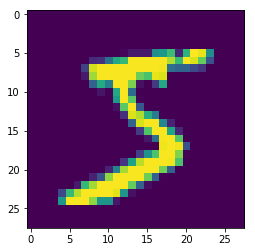

In [29]:
import matplotlib.pyplot as plt

digit = X_train[0]
digit_pixels = digit.reshape(28, 28)
plt.imshow(digit_pixels)

print(y_train[0])

Looks like it is workign alright. We are getting the same answer for both.

### Using SGDClassifier with loss = 'hinge'

* Here we will be classifying using the linear SVM classifier.
* To do so we have to set the `loss` parameter to 'hinge'. This is also set by default, but because we will be comparing it with Logistic Regression, so, it is better to set it manually as well.

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

Let us cross-validate our results first by predicting from the data set and also by looking at the scores.

In [31]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print(cross_val_predict(sgd_clf, X_train, y_train, cv=3))
print(cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy'))


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

[5 0 4 ... 5 6 8]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

[0.86872625 0.87639382 0.87848177]


So, for cross-validation scores, we are getting around 87% accuracy.

* **The cross validation scores seem just okay. Not too bad, not too good either. So, let us look at the scores.**

Now, let us predict using the test set and also see the accuracy scores on the test set.

In [32]:
from sklearn.metrics import accuracy_score

sgd_svm_pred = sgd_clf.predict(X_test)
sgd_svm_pred

array([7, 2, 1, ..., 4, 5, 6])

In [33]:
sgd_accuracy = accuracy_score(y_test, sgd_svm_pred)
sgd_accuracy

0.8453

Interesting, we got less score than cross validation. So, the model is generalizing a bit worse with the test set.

## Using `loss='log'` for Logistic Regression

In [34]:
sgd_clf = SGDClassifier(loss='log', random_state=42)
sgd_clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
sgd_log_pred = sgd_clf.predict(X_test)
sgd_log_pred

array([7, 2, 1, ..., 4, 5, 6])

In [36]:
sgd_log_score = accuracy_score(y_test, sgd_log_pred)
sgd_log_score

0.889

So, we are getting better results by using Logistic Regression.  
**But can we achieve above 95% accuracy somehow? Let us see whether using `KNeighborsClassifier` can give us above 90% accuracy (or maybe we should try for more than 95% accuracy).**

## Using KNN

In this part we will be using KNN classifier to **train** the model, get the **cross-validation** scores, **predict the probabilities** and also get the **final score**.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

def knn_fit(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1):
    knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
    knn.fit(X_train, y_train)
    
#     print(n_neighbors, weights)

    knn_pred = knn.predict(X_test)
    
    print('KNN Score: ', knn.score(X_test, y_test))
    print('Accuracy:', accuracy_score(y_test, knn_pred))
    


In [38]:
knn_fit(n_neighbors=5)


KNN Score:  0.9705
Accuracy: 0.9705


WOW! we are getting over 97% accuracy by using KNN, and that too without using any hyperparameter tuning. Now, it is all up to you to make the model even better. Try using **`GridSearchCV`** and make some changes to the hyperparameters.